In [1]:
from braindecode.datasets import TUHAbnormal
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from InstructorEmbedding import INSTRUCTOR

/home/jovyan/test_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:

"""
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")
"""

instructor_model = AutoModel.from_pretrained("hkunlp/instructor-xl")
instructor_tokenizer = AutoTokenizer.from_pretrained("hkunlp/instructor-xl")

instructor_model_2 = INSTRUCTOR('hkunlp/instructor-xl')

def sentence_embedder(sentence):
    """
    desc_tokenized = bert_tokenizer(sentence, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    outputs = bert_model(**desc_tokenized)
    emb = outputs.to_tuple()[0][0][0].detach().numpy().tolist()


    desc_tokenized = instructor_tokenizer(sentence, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    outputs = instructor_model.encoder(**desc_tokenized)
    emb = outputs.to_tuple()[0][0][0].detach().numpy().tolist()
    """
    instruction = "Represent the medical report: "
    emb = instructor_model_2.encode([[instruction,sentence]])[0]
    
    
    return emb 

Some weights of T5Model were not initialized from the model checkpoint at hkunlp/instructor-xl and are newly initialized: ['decoder.block.6.layer.1.EncDecAttention.k.weight', 'decoder.block.23.layer.0.SelfAttention.k.weight', 'decoder.block.7.layer.0.SelfAttention.o.weight', 'decoder.block.6.layer.1.layer_norm.weight', 'decoder.block.10.layer.1.layer_norm.weight', 'decoder.block.6.layer.0.SelfAttention.v.weight', 'decoder.block.15.layer.2.layer_norm.weight', 'decoder.block.21.layer.0.layer_norm.weight', 'decoder.block.10.layer.2.layer_norm.weight', 'decoder.block.8.layer.0.SelfAttention.v.weight', 'decoder.block.8.layer.2.layer_norm.weight', 'decoder.block.7.layer.0.SelfAttention.k.weight', 'decoder.block.8.layer.0.SelfAttention.o.weight', 'decoder.block.15.layer.1.EncDecAttention.o.weight', 'decoder.block.4.layer.0.SelfAttention.k.weight', 'decoder.block.2.layer.1.layer_norm.weight', 'decoder.block.7.layer.1.layer_norm.weight', 'decoder.block.8.layer.1.EncDecAttention.o.weight', 'deco

load INSTRUCTOR_Transformer
max_seq_length  512


In [ ]:
sentence = "REASON FOR STUDY:  Seizures. CLINICAL HISTORY:  A 34-year-old woman with a history of seizures as well as kidney disease with  last one 2 months. MEDICATIONS:  Lipitor, Lamictal. INTRODUCTION:  A routine EEG was performed using the standard 10-20 electrode placement system with the addition of anterior temporal and single lead EKG electrode.  The patient was recorded during wakefulness and drowsiness with activating procedures including hyperventilation and photic stimulation. TECHNICAL DIFFICULTIES:  None. DESCRIPTION OF THE RECORD:  The record opens to a well-defined posterior dominant rhythm that reaches 9 Hz, which is reactive to eye opening.  There is normal frontocentral beta.  The patient was recorded during wakefulness and stage 1 sleep.  Activating procedures including  hyperventilation and photic stimulation produced no abnormal discharges. ABNORMAL DISCHARGES:  None. HEART RATE:  60. IMPRESSION:  Normal awake and sleep EEG. CLINICAL CORRELATION:  This is a normal awake and sleep EEG.  No seizures or epileptiform discharges were seen."

sentence_embedder(sentence)

In [28]:
report_embeddings = []
for i, r in enumerate(report_df['report']):
        if i % 100:
                print(i,'/',len(report_df['report']))
        emb = sentence_embedder(r)
        report_embeddings.append(emb)

report_embeddings = np.array(report_embeddings)
report_df['embs_instructor'] = report_embeddings.tolist()



1 / 2948
2 / 2948
3 / 2948
4 / 2948
5 / 2948
6 / 2948
7 / 2948
8 / 2948
9 / 2948
10 / 2948
11 / 2948
12 / 2948
13 / 2948
14 / 2948
15 / 2948
16 / 2948
17 / 2948
18 / 2948
19 / 2948
20 / 2948
21 / 2948
22 / 2948
23 / 2948
24 / 2948
25 / 2948
26 / 2948
27 / 2948
28 / 2948
29 / 2948
30 / 2948
31 / 2948
32 / 2948
33 / 2948
34 / 2948
35 / 2948
36 / 2948
37 / 2948
38 / 2948
39 / 2948
40 / 2948
41 / 2948
42 / 2948
43 / 2948
44 / 2948
45 / 2948
46 / 2948
47 / 2948
48 / 2948
49 / 2948
50 / 2948
51 / 2948
52 / 2948
53 / 2948
54 / 2948
55 / 2948
56 / 2948
57 / 2948
58 / 2948
59 / 2948
60 / 2948
61 / 2948
62 / 2948
63 / 2948
64 / 2948
65 / 2948
66 / 2948
67 / 2948
68 / 2948
69 / 2948
70 / 2948
71 / 2948
72 / 2948
73 / 2948
74 / 2948
75 / 2948
76 / 2948
77 / 2948
78 / 2948
79 / 2948
80 / 2948
81 / 2948
82 / 2948
83 / 2948
84 / 2948
85 / 2948
86 / 2948
87 / 2948
88 / 2948
89 / 2948
90 / 2948
91 / 2948
92 / 2948
93 / 2948
94 / 2948
95 / 2948
96 / 2948
97 / 2948
98 / 2948
99 / 2948
101 / 2948
102 / 29

In [29]:
report_df.to_csv("report_df_embs.csv")

: 

In [ ]:
### GET DATA FOR EACH RECORDING
"""
TUHAbnormal_PATH = '/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2.0.0'
N_JOBS = 8  # specify the number of jobs for loading and windowing


tuh = TUHAbnormal(
    path=TUHAbnormal_PATH,
    recording_ids=None,
    target_name=('report','pathological','gender','age'),
    preload=False,
    add_physician_reports=True,
    n_jobs=N_JOBS, 
)

tuh_subjects = tuh.split('subject')
key_list = list(tuh_subjects.keys())
report_df = pd.DataFrame(columns=('report', 'pathological', 'gender', 'age'))
for i in range(len(key_list)):
   report_df.loc[i] = tuh_subjects[key_list[i]][0][1]

report_df.to_csv("report_df.csv")
"""
### GET EMBEDDINGS FOR THE REPORT COLUMN
"""
report_df = pd.read_csv("report_df.csv")
report_embeddings = []
for r in report_df['report']:
        emb = sentence_embedder(r)
        report_embeddings.append(emb)

report_embeddings = np.array(report_embeddings)
report_df['embs_bert'] = report_embeddings.tolist()

report_df.to_csv("report_df.csv")
"""

In [3]:
embs_name = "embs_instructor"

In [4]:
report_df = pd.read_csv("report_df.csv")

# convert the report embeddings from string to array
import copy
for r in range(len(report_df)):
    re = copy.copy(report_df[embs_name][r])
    # convert the string to array
    re = re.replace('[', '')
    re = re.replace(']', '')
    re = re.replace(',', '')
    re = re.split()
    re = [float(i) for i in re]
    report_df[embs_name][r] = re


/tmp/ipykernel_395/2805716872.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_df[embs_name][r] = re


In [26]:
s = 'CLINICAL HISTORY:  The patient is a 68-year-old woman who presents after a single episode of passing out.\nMEDICATIONS:  None.\nINTRODUCTION:  The recording was performed according to the standard 10-20 system with additional T1 and T2 electrode and a single EKG lead.    Hyperventilation with photic stimulation were performed.\nDESCRIPTION OF THE RECORD:  The posterior dominant rhythm consists of a well formed and modulated 9.5 Hz alpha activity that attenuates with eyes opening.  Fast alpha variant is frequently present.  There is an anterior to posterior frequency amplitude gradient with faster frequencies at lower amplitudes anteriorly.  No sleep is captured.\nHyperventilation produces mild symmetrical diffuse slowing.\nPhotic stimulation results in occipital driving at multiple flash frequencies.\nAn irregular heart rate is captured in a single EKG lead.\nFINDINGS:\nNo epileptiform discharges.\nNo stage II sleep.\nIMPRESSION:  This is a normal awake only 22 minute EEG.  No epileptiform discharges were captured.  However, stage II sleep was not recorded. If clinical indication for epilepsy still persists, a repeat study with sleep may be of benefit.\n\n\n\n'
#report_df.loc[report_df['report'] == s, 'report']

report_df.loc[report_df['report'].str.contains(s), 'report']


341    CLINICAL HISTORY:  The patient is a 68-year-ol...
Name: report, dtype: object

In [2]:
TUHAbnormal_PATH = '/home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2.0.0'
N_JOBS = 8  # specify the number of jobs for loading and windowing


tuh = TUHAbnormal(
    path=TUHAbnormal_PATH,
    recording_ids=None,
    target_name=('report'),
    preload=False,
    add_physician_reports=True,
    n_jobs=N_JOBS, 
)

tuh_subjects = tuh.split('subject')
key_list = list(tuh_subjects.keys())
report_df = pd.DataFrame(columns=('report',))
for i in range(len(key_list)):
   report_df.loc[i] = tuh_subjects[key_list[i]][0][1]



Extracting EDF parameters from /home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2.0.0/edf/train/abnormal/01_tcp_ar/059/00005928/s001_2009_09_11/00005928_s001_t000.edf...
EDF file detected
Extracting EDF parameters from /home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2.0.0/edf/eval/normal/01_tcp_ar/041/00004196/s003_2009_09_03/00004196_s003_t000.edf...
EDF file detected
Extracting EDF parameters from /home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2.0.0/edf/eval/normal/01_tcp_ar/062/00006201/s001_2009_09_10/00006201_s001_t000.edf...
EDF file detected
Extracting EDF parameters from /home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2.0.0/edf/train/normal/01_tcp_ar/059/00005909/s002_2009_09_09/00005909_s002_t000.edf...
EDF file detected
Extracting EDF parameters from /home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2.0.0/edf/eval/normal/01_tcp_ar/058/00005851/s001_2009_09_04/00005851_s001_t001.edf...
EDF file detected
Extracting EDF parameters from /home/jovyan/mne_data/TUH/tuh_eeg_abnormal/v2.0.0/edf/train/norma

In [23]:
import pickle
with open('/home/jovyan/parrot.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [24]:
report_df = pd.DataFrame(mynewlist, columns =['report'])

In [25]:
len(report_df)

2948

In [ ]:
# distribution of the report column
# count "epilep" in the report column. Among those, exclude the ones with "no epilep"
report_df['report'].str.lower().str.contains('epilep').value_counts()
report_df['report'].str.lower().str.contains('no epilep').value_counts()


report
False    1546
True      783
Name: count, dtype: int64

In [6]:
# new column detecting if the report contains the word "seizure" Must filter out "no seizure"
report_df['seizure'] = report_df['report'].str.contains('seizure', case=False)
report_df['seizure'] = report_df['seizure'] & ~report_df['report'].str.contains('no seizure', case=False)

# new column detecting if the report contains the word "epilep". Must filter out "no epilep"
report_df['epilep'] = report_df['report'].str.contains('epilep', case=False)
report_df['epilep'] = report_df['epilep'] & ~report_df['report'].str.contains('no epilep', case=False)
# medication list 
medication_list = ["keppra", "dilantin", "depakote"]
# new column detecting if the report contains one or more medications
report_df['medication'] = report_df['report'].str.contains('|'.join(medication_list), case=False)

# convert the 'gender' column to 0 and 1
report_df['gender'].replace({'M': 0, 'F': 1}, inplace=True)

# new column under_50 detecting if the age is under 50
report_df['under_50'] = report_df['age'] < 50

In [13]:
# decode category from embeddings using logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

X = np.asarray(report_df[embs_name].values.tolist())
y = report_df["seizure"].values


model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2)
print("balance of classes in train set: ", np.mean(y_train))
print("balance of classes in test set: ", np.mean(y_test))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: ", balanced_accuracy_score(y_test, y_pred))



balance of classes in train set:  0.46484165324745036
balance of classes in test set:  0.45493562231759654
Accuracy:  0.763612390432328


In [ ]:
report_df["embs_instructor"][0]

In [84]:
# using distance (cosine similarity) to classify reports




"""





"""
field = "pathological"
s0 = "This is a normal recording."
s1 = "This is an abnormal recording."

field = "medication"
s0 = "no anti-epileptic drugs were prescribed to the patient" #"The patient is unlikely to have been prescribed anti-epileptic drugs (anticonvulsants, keppra, dilantin or depakote), used to control seizures"  #"keppra", "dilantin", "depakote"
s1 = "anti-epileptic drugs medication was prescribed to the patient" #"The patient is likely to have been prescribed anti-epileptic drugs (anticonvulsants, keppra, dilantin or depakote), used to control seizures"  #"keppra, dilantin or depakote" 


field = "seizure"
s0 = "The patient is very unlikely to be subject to seizures"
s1 = "The patient is very likely to be subject to seizures"


field = "under_50"
s0 = "The patient is over 50 year old"
s1 = "The patient is under 50 year old"

field = "gender"
s0 = "The patient is male"
s1 = "The patient is female"


field = "epilep"
s0 = "The patient does not have epilepsy"
s1 = "The patient has epilepsy"

s0_embed = sentence_embedder(s0)
s1_embed = sentence_embedder(s1)

In [86]:
### find typical sentence for each class by doing the mean of the embeddings of the sentences in the class
field = "medication"
s0_embed = np.mean(report_df[report_df[field] == 0][embs_name].values.tolist(), axis=0)
s1_embed = np.mean(report_df[report_df[field] == 1][embs_name].values.tolist(), axis=0)

In [87]:
from scipy.spatial import distance
# classify each report as either s0 or s1
distance_classifier = []
for r in report_df[embs_name]:
    d0 = distance.cosine(r, s0_embed)
    d1 = distance.cosine(r, s1_embed)
    if d0 < d1:
        distance_classifier.append(0)
    else:
        distance_classifier.append(1)

print("label balance :", np.mean(distance_classifier))

# compare to the actual labels
print("Accuracy: ", balanced_accuracy_score(report_df[field], distance_classifier))


label balance : 0.42765135251180764
Accuracy:  0.7277086493490077


In [ ]:
# decode age from embeddings using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#model = LinearRegression()

# using a mlp
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)


# using xgboost
import xgboost as xgb
#model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)

y = report_df["age"].values


X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
# average age error
print("MAE: ", np.mean(np.abs(y_test - y_pred)))

ModuleNotFoundError: No module named 'xgboost'

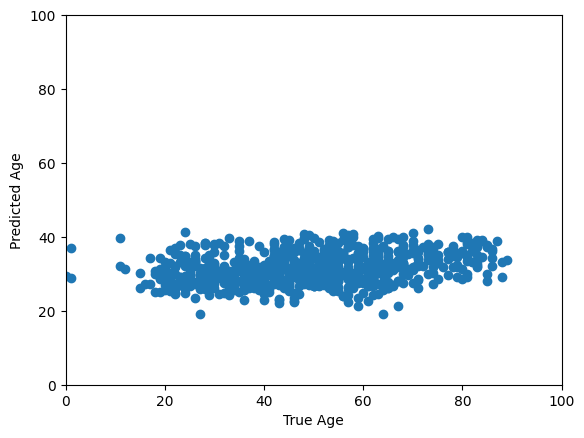

In [ ]:
# plot predicted age vs. true age
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
# set xmin and xmax to the same value to make the plot square
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [3]:
from sentence_transformers import SentenceTransformer

model = AutoModel.from_pretrained("hkunlp/instructor-xl")/
tokenizer = AutoTokenizer.from_pretrained("hkunlp/instructor-xl")

Downloading: 100%|██████████| 1.52k/1.52k [00:00<00:00, 558kB/s]
Downloading: 100%|██████████| 4.96G/4.96G [01:45<00:00, 47.0MB/s]
Some weights of T5Model were not initialized from the model checkpoint at hkunlp/instructor-xl and are newly initialized: ['decoder.block.4.layer.2.layer_norm.weight', 'decoder.block.23.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.12.layer.1.EncDecAttention.k.weight', 'decoder.block.20.layer.2.DenseReluDense.wi.weight', 'decoder.block.2.layer.2.DenseReluDense.wo.weight', 'decoder.block.15.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.2.layer.0.SelfAttention.q.weight', 'decoder.block.14.layer.0.SelfAttention.k.weight', 'decoder.block.9.layer.2.DenseReluDense.wi.weight', 'decoder.block.14.layer.1.layer_norm.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.21.layer.1.EncDecAttention.v.weight', 'decoder.bl

In [5]:
"""
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")
"""
sentence = "sauce"
desc_tokenized = tokenizer(sentence, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
outputs = model.encoder(**desc_tokenized)
emb = outputs.to_tuple()[0][0][0].detach().numpy().tolist()


In [7]:
outputs

BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[ 5.1890e-01,  1.2115e-01, -2.6725e-02,  ...,  7.7272e-02,
           5.0293e-01, -3.4116e-01],
         [ 7.1057e-02,  6.9810e-02, -4.7813e-02,  ...,  2.0375e-01,
           1.1002e-01, -6.0529e-02],
         [-1.2254e-01,  1.4338e-01,  9.5085e-02,  ...,  1.2603e-01,
           5.8572e-01, -1.9992e-01],
         ...,
         [-1.2521e-01,  1.0445e-01, -7.1089e-02,  ..., -2.5637e-04,
           3.1636e-01, -3.5995e-01],
         [-1.2521e-01,  1.0445e-01, -7.1089e-02,  ..., -2.5637e-04,
           3.1636e-01, -3.5995e-01],
         [-1.2521e-01,  1.0445e-01, -7.1089e-02,  ..., -2.5637e-04,
           3.1636e-01, -3.5995e-01]]], grad_fn=<MulBackward0>), past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)